Simple hello world to build a first graph

In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    message: str
    name: str


def greeting_start(state: AgentState) -> AgentState:
    """Simple node that beginns a message with 'hello'"""
    state["message"] = f"Hello "
    return state

def greeting_middle(state: AgentState) -> AgentState:
    """Simple node that adds the beginning of the message a middle part and saves it to the state"""
    state["message"] = state["message"] + state["name"]
    return state

def greeting_end(state: AgentState) -> AgentState:
    """Simple node that ends the message"""
    state["message"] = state["message"] + ", how is your day going?"
    return state

In [9]:
graph = StateGraph(AgentState)

graph.add_node("beginn_message", greeting_start)
graph.add_node("middle_message", greeting_middle)
graph.add_edge("beginn_message", "middle_message")
graph.add_node("end_message", greeting_end)
graph.add_edge("middle_message", "end_message")

graph.set_entry_point("beginn_message")
graph.set_finish_point("end_message")

app = graph.compile()

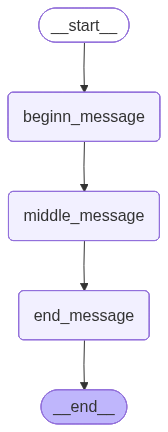

In [10]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
result = app.invoke({"name": "Jonas"})

In [13]:
result["message"]

'Hello Jonas, how is your day going?'